## **COMP-3703 (241551) Introduction to Artificial Intelligence**
## **Project1 Titanic - Bonus**
### **Felix Cazarez - 0378585**


Decision Tree Learning¶
In this document we study the sinking of the RMS Titanic. One of the most famous shipwrecks and one of the most remembered catastrophes in world history.

The sinking of the Titanic led to a huge amount of life loss due to the lack of lifeboats for the passengers and the crew on board.

We explore the different groups that were formed in the shipwreck such as gender, age, classes. In our study we reflect how some of these groups were more likely to survive.

We used data analitics and informatic algorithms to investigate this phenomena and show our results.

In [1]:
# importing  libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score

### **1. Load the Data**

In [2]:
# read the csv's files
train_csv = "https://raw.githubusercontent.com/Fcazarez/RRC_3l_IntroAI_Titanic_challenge/main/train.csv"
train_df = pd.read_csv(train_csv)

test_csv = "https://raw.githubusercontent.com/Fcazarez/RRC_3l_IntroAI_Titanic_challenge/main/test.csv"
test_df = pd.read_csv(test_csv)

gender_csv = "https://raw.githubusercontent.com/Fcazarez/RRC_3l_IntroAI_Titanic_challenge/main/gender_submission.csv"
gender_df = pd.read_csv(gender_csv)

In [3]:
#Take a look at data sets:
print(train_df.info())
print('==='*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

### **2. EDA Exploratory Data Analysis**

In [4]:
print(test_df.describe())
print('==='*30)
print(train_df.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min      

In [5]:
#Verify nulls
print(train_df.isna().sum())
print('===='*30)
print(test_df.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
#Check for duplicated info
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


### **Features Description**

| Feature       | Description                                                                                                   |
|---------------|---------------------------------------------------------------------------------------------------------------|
| PassengerId   | Unique identifier for each passenger.                                                                        |
| Survived      | Indicates whether the passenger survived (1.0) or did not survive (0.0).                                    |
| Pclass        | Passenger class, representing the socio-economic status of the passenger (1 = Upper, 2 = Middle, 3 = Lower). |
| Name          | Full name of the passenger, including titles and honorifics.                                                |
| Sex           | Gender of the passenger (male or female).                                                                   |
| Age           | Age of the passenger.                                                                                       |
| SibSp         | Number of siblings or spouses traveling with the passenger.                                                  |
| Parch         | Number of parents or children traveling with the passenger.                                                  |
| Ticket        | Ticket number or identifier.                                                                                 |
| Fare          | Fare paid by the passenger for the ticket.                                                                   |
| Cabin         | Cabin number or identifier where the passenger stayed (NaN indicates missing data).                         |
| Embarked      | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).                                        |



In [7]:
train_df = train_df.replace("female", 1)
train_df = train_df.replace("male", 0)
train_df = train_df.replace("S", 0)
train_df = train_df.replace("C", 1)
train_df = train_df.replace("Q", 2)
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,1,0,1,1,0,0
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


In [8]:
test_df = test_df.replace("female", 1)
test_df = test_df.replace("male", 0)
test_df = test_df.replace("S", 0)
test_df = test_df.replace("C", 1)
test_df = test_df.replace("Q", 2)
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)","Svensson, Mr. Johan Cervin","Connolly, Miss. Kate","Caldwell, Mr. Albert Francis","Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Davies, Mr. John Samuel",...,"Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0,18.0,21.0,...,NaN,3.0,NaN,37.0,28.0,NaN,39.0,38.5,NaN,NaN
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298,7538,330972,248738,2657,A/4 48871,...,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.8292,7.0,9.6875,8.6625,12.2875,9.225,7.6292,29.0,7.2292,24.15,...,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN


In [9]:
train_df.Fare.fillna(train_df.Fare.mode()[0], inplace=True)
train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace=True)
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
train_df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,0,1,1,1,0
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [10]:
test_df.Fare.fillna(train_df.Fare.mode()[0], inplace=True)
test_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace=True)
test_df.Age.fillna(train_df.Age.mean(), inplace=True)
test_df.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,0,1,0,0,1
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [11]:
train_df.drop(['Name','Ticket', 'Cabin'],axis=1, inplace=True)
train_df.head().T

,0,1,2,3,4
PassengerId,1.00,2.0000,3.000,4.0,5.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Sex,0.00,1.0000,1.000,1.0,0.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,0.00,1.0000,0.000,0.0,0.00


In [12]:
test_df.drop(['Name','Ticket', 'Cabin'],axis=1, inplace=True)
test_df.head().T

,0,1,2,3,4
PassengerId,892.0000,893.0,894.0000,895.0000,896.0000
Pclass,3.0000,3.0,2.0000,3.0000,3.0000
Sex,0.0000,1.0,0.0000,0.0000,1.0000
Age,34.5000,47.0,62.0000,27.0000,22.0000
SibSp,0.0000,1.0,0.0000,0.0000,1.0000
Parch,0.0000,0.0,0.0000,0.0000,1.0000
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Embarked,2.0000,0.0,2.0000,0.0000,0.0000


In [13]:
print(train_df.isna().sum())
print("==="*30)
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [14]:
train_df = train_df.dropna()
nan_check = train_df.isna().sum()
nan_check

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
test_df = test_df.dropna()
nan_check = test_df.isna().sum()
nan_check

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
print(train_df.info())
print('==='*30)

print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 

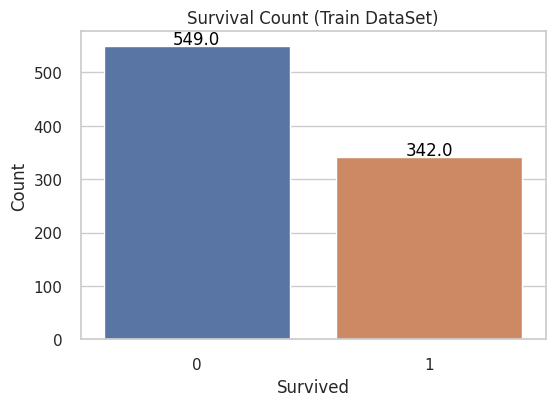

In [17]:
# Create the countplot
sns.set(style="whitegrid")  # Optional: Set a style
plt.figure(figsize=(6, 4))  # Optional: Set the figure size

# Create the countplot
ax = sns.countplot(data=train_df, x='Survived')

# Add tags (annotations) to each group
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optionally, set labels and a title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count (Train DataSet)")

# Show the plot
plt.show()


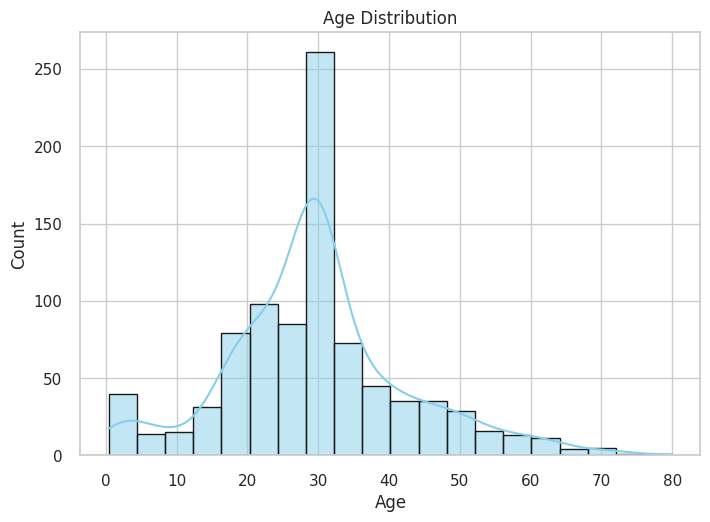

In [18]:
# Create a histogram with seaborn
sns.histplot(data=train_df, x='Age', kde=True, color='skyblue', edgecolor='k', bins=20)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the plot
plt.show()

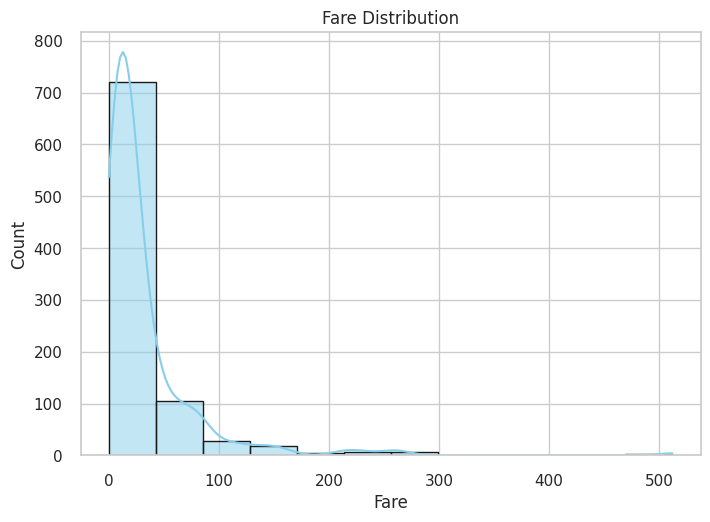

In [19]:
# Create a histogram with seaborn
sns.histplot(data=train_df, x='Fare', kde=True, color='skyblue', edgecolor='k', bins=12)

# Set labels and title
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')

# Show the plot
plt.show()

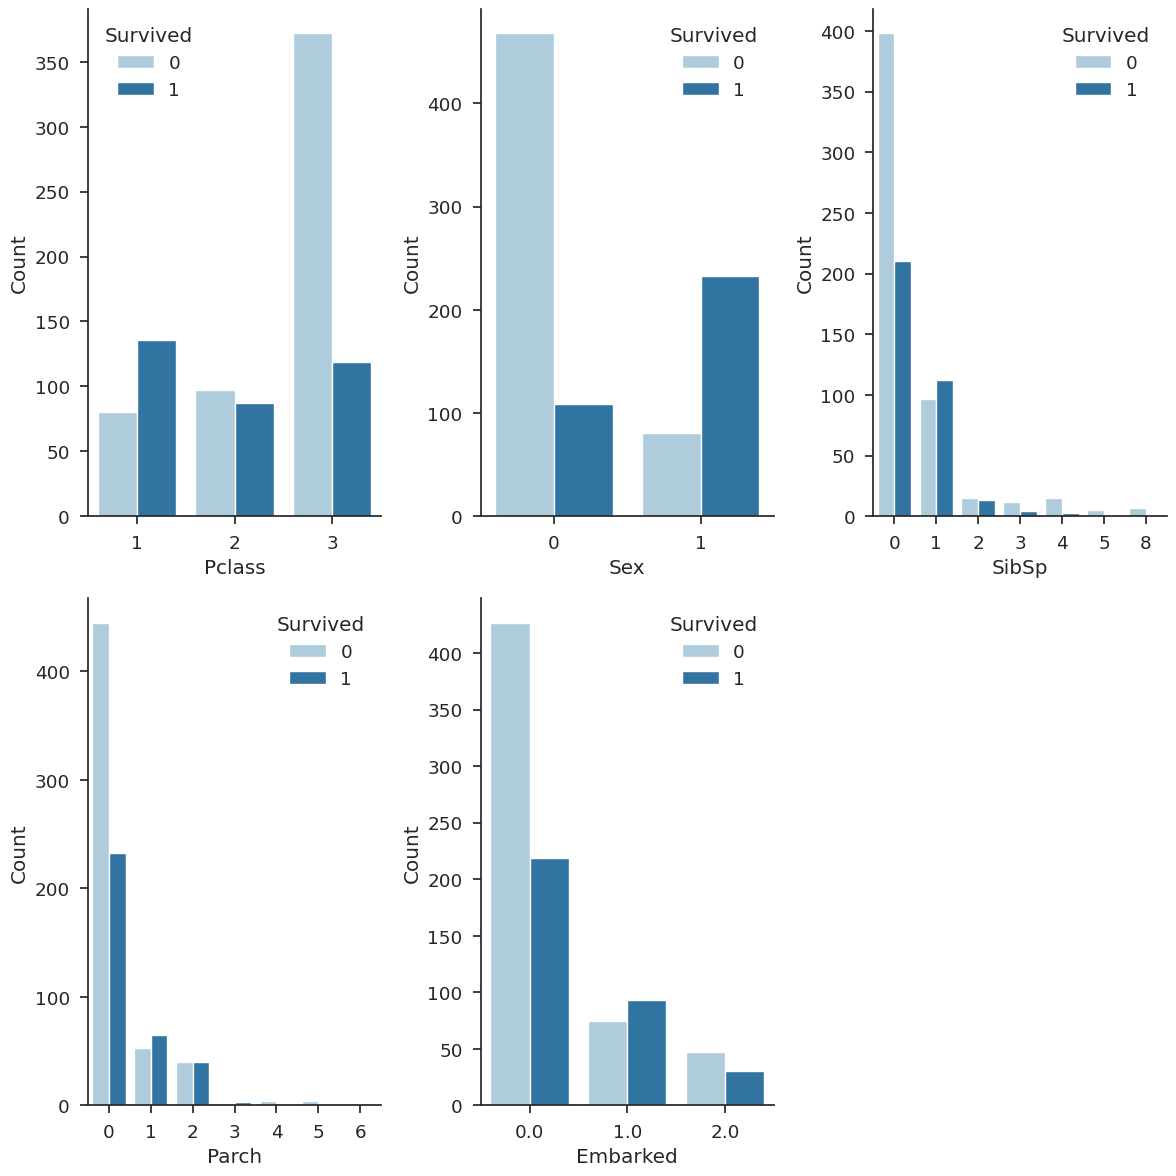

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Set the figure size and style
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.2)
sns.set_style('ticks')

# Create subplots for each feature
for i, feature in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(data=train_df, x=feature, hue='Survived', palette='Paired')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Remove spines for a cleaner look
sns.despine()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()




## **3. Modeling**

In [21]:
print(train_df.info())

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 

In [22]:
#Split the data into features and Tags
# Split the data into features and target for training set
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Split the data into features and target for testing set
#X_test = test_df.drop('Survived', axis=1)
#y_test = test_df['Survived']
X_test = test_df
y_test = np.zeros(418)


In [23]:
print("len of X_train (features train):", len(X_train))
print("len of X_test (features test):", len(X_test))
print("len of y_train (Tags Train):", len(y_train))
print("len of y_test (Tags Test):", len(y_test))

len of X_train (features train): 891
len of X_test (features test): 418
len of y_train (Tags Train): 891
len of y_test (Tags Test): 418


In [24]:
#Normalize de Dta with stabdar scaler

scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_train


array([[-1.73010796,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.72622007, -1.56610693,  1.35557354, ..., -0.47367361,
         0.78684529,  1.00518113],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ...,  2.00893337,
        -0.17626324, -0.56883712],
       [ 1.72622007, -1.56610693, -0.73769513, ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 1.73010796,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [25]:
scaler=StandardScaler()
scaler.fit(X_test)
scaled_X_test= scaler.transform(X_test)
scaled_X_test

array([[-1.72791209,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.49707917,  2.24316522],
       [-1.71962474,  0.87348191,  1.32287566, ..., -0.4002477 ,
        -0.51194207, -0.6778412 ],
       [-1.71133739, -0.31581919, -0.75592895, ..., -0.4002477 ,
        -0.46377029,  2.24316522],
       ...,
       [ 1.71133739,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.50746097, -0.6778412 ],
       [ 1.71962474,  0.87348191, -0.75592895, ..., -0.4002477 ,
        -0.49312147, -0.6778412 ],
       [ 1.72791209,  0.87348191, -0.75592895, ...,  0.61989583,
        -0.23665406,  0.78266201]])

## **4. Creating decision tree**

In [26]:
model= DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

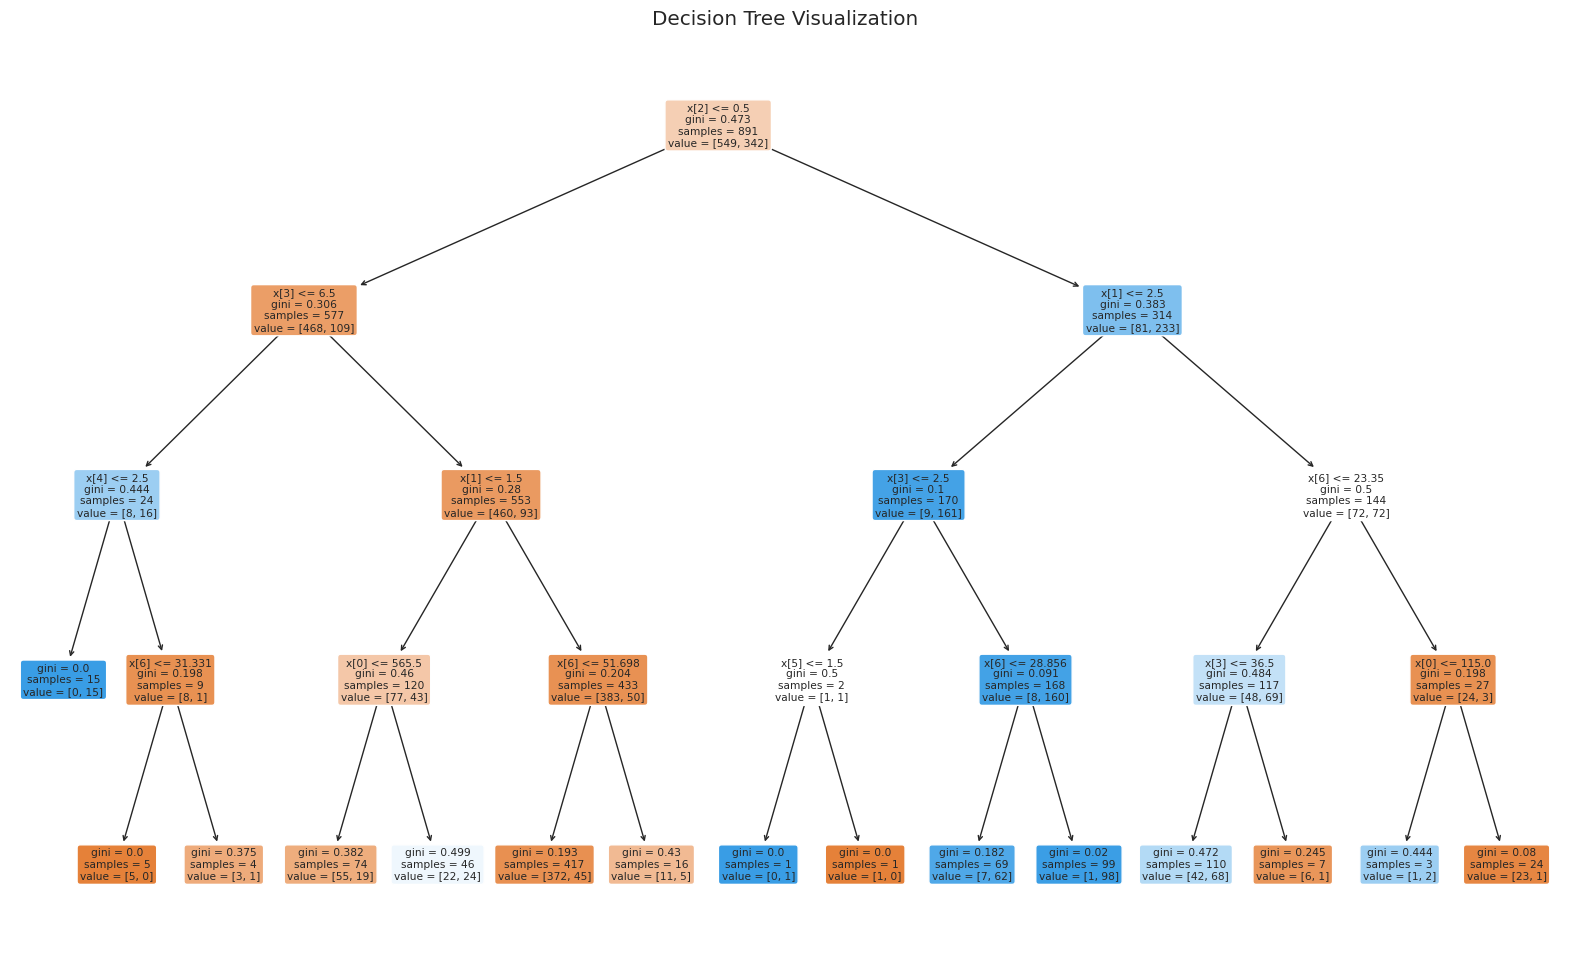

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with your desired parameters
model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model on your training data
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(model, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [29]:
# Create a DataFrame
df_predictions = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': y_pred})

# Display the DataFrame
print(df_predictions)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [30]:
# Save the DataFrame as a CSV file
df_predictions.to_csv('submission.csv', index=False)

In [31]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the file name
file_name = 'df_predictions.csv'

# Construct the full file path
file_path = os.path.join(current_directory, file_name)

print("File saved at:", file_path)


File saved at: /kaggle/working/df_predictions.csv


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
confusion_matrix(y_test, y_pred)

Accuracy: 0.52


array([[218, 200],
       [  0,   0]])

In [33]:
print("len of X_train (features train):", len(X_train))
print("len of X_test (features test):", len(X_test))
print("len of y_train (Tags Train):", len(y_train))
print("len of y_test (Tags Test):", len(y_test))

len of X_train (features train): 891
len of X_test (features test): 418
len of y_train (Tags Train): 891
len of y_test (Tags Test): 418


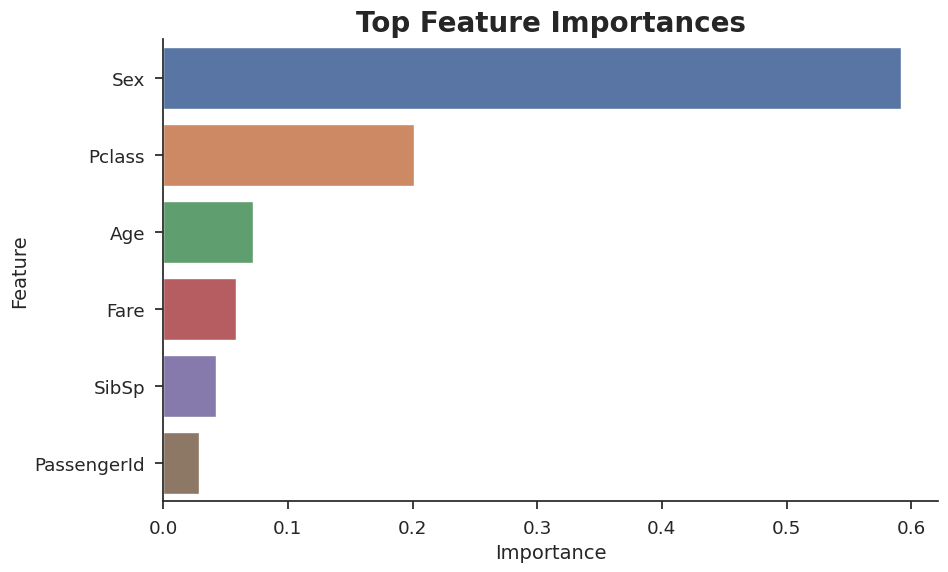

In [34]:
# Get feature importances from the trained model
importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_importances = importances.nlargest(6)  # Select the top 6 features

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_importances.index, palette="deep")
plt.title("Top Feature Importances", fontsize=20, fontweight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
sns.despine()
plt.show()


### **Bibliography** 
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
https://www.kaggle.com/c/titanic
https://www.kaggle.com/learn/machine-learning
https://www.kaggle.com/learn/pandas
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish